<a href="https://colab.research.google.com/github/afaqahmed91/deeplearning/blob/main/notebooks%20/practice/Multivariate_RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving energydata_complete.csv to energydata_complete.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("energydata_complete.csv", index_col = "date", parse_dates = True)


In [3]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


<Axes: xlabel='date'>

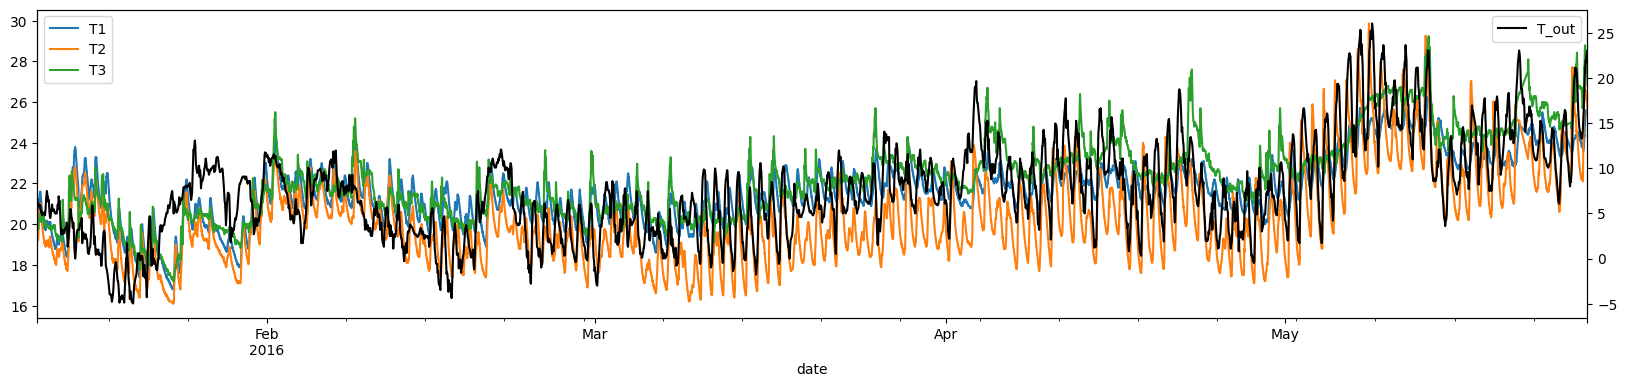

In [4]:
fig, ax = plt.subplots(1, figsize = (20,4))
df[["T1", "T2", "T3"]].plot(ax=ax)
ax2 = ax.twinx()
df[["T_out"]].plot(ax=ax2, color = "black")

In [5]:
df_may = df.loc["2016-05":].round(1)

In [6]:
df_may.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,,,,,,,,,,,,,,,,,,,,,
2016-05-01 00:00:00,50,0,21.2,38.2,18.4,41.4,23.2,36.4,19.7,37.7,...,19.2,38.2,4.3,763.7,86.0,2.0,40.0,2.2,15.3,15.3
2016-05-01 00:10:00,60,0,21.2,38.2,18.4,41.5,23.1,36.5,19.7,37.7,...,19.1,38.3,4.3,763.7,86.3,2.2,38.2,2.2,11.2,11.2
2016-05-01 00:20:00,50,0,21.1,38.1,18.3,41.5,23.2,36.5,19.7,37.6,...,19.1,38.4,4.3,763.7,86.7,2.3,36.3,2.2,21.8,21.8
2016-05-01 00:30:00,50,0,21.1,38.1,18.3,41.5,23.2,36.5,19.7,37.5,...,19.2,38.5,4.2,763.8,87.0,2.5,34.5,2.2,47.0,47.0
2016-05-01 00:40:00,60,0,21.1,38.0,18.3,41.6,23.2,36.5,19.7,37.5,...,19.2,38.6,4.2,763.8,87.3,2.7,32.7,2.3,8.1,8.1


In [7]:
test_days = 2
test_ind = test_days * 24 * 6
test_ind

288

In [8]:
train = df_may.iloc[:-288]
test = df_may.iloc[-288:]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

scaled_train  = scaler.transform(train)
scaled_test  = scaler.transform(test)

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [11]:
n_features = len(df_may.columns)
n_inputs = 144
generator = TimeseriesGenerator(data=scaled_train, targets=scaled_train, length=n_inputs, batch_size=1)

(n_inputs, n_features)

(144, 28)

In [12]:
X, y  = generator[0]

In [13]:
y.shape

(1, 28)

In [14]:
X.shape

(1, 144, 28)

In [15]:
### Defining the RNN Model structure ###
def build_model(rnn_units, n_input, n_features):
  model = tf.keras.Sequential([

    # Layer 1: LSTM with `rnn_units` number of units.
    # TODO: Call the LSTM function defined above to add this layer.
    tf.keras.layers.LSTM(
    rnn_units,
    activation='tanh', # (default = tanh) final activation is tanh
    recurrent_initializer='glorot_uniform', # (default)
    recurrent_activation='sigmoid', # (default) internal activation is signmoid
    input_shape=(n_input, n_features),
    ),

    # Layer 2: Dense (fully-connected) layer that transforms the LSTM output
    #   into the vocabulary size.
    # TODO: Add the Dense layer.
    tf.keras.layers.Dense(n_features)
  ])

  return model

In [16]:
model = build_model(300, n_inputs, n_features)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 300)               394800    
                                                                 
 dense (Dense)               (None, 28)                8428      
                                                                 
Total params: 403228 (1.54 MB)
Trainable params: 403228 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# test Model
test_pred = model(X)
test_pred.numpy()

array([[-0.06690291,  0.03345438,  0.21487762,  0.05164192, -0.10938744,
         0.1367202 ,  0.04754394, -0.08497775, -0.07668942,  0.11932279,
        -0.09182702,  0.10832168,  0.04540402, -0.07553165, -0.0950737 ,
        -0.12413201,  0.11948182,  0.09861912, -0.1223454 ,  0.11031607,
        -0.05734432,  0.05131472,  0.04368535, -0.09566631,  0.10663315,
         0.02140424, -0.0287248 ,  0.02462264]], dtype=float32)

In [19]:
### Defining the loss function ###
def compute_loss(labels, logits):
  loss = tf.keras.losses.MeanSquaredError()
  return loss(labels,logits)

In [20]:
# test loss

example_batch_loss = compute_loss(y, test_pred) # TODO
print("scalar_loss:      ", example_batch_loss.numpy().mean())

scalar_loss:       0.11107729


In [21]:
### Defining the Optimezer ###
'''Checkout the tensorflow website for a list of supported optimizers.
  https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/
  Try using the Adam optimizer to start.'''
optimizer = tf.keras.optimizers.Adam(
    learning_rate = 0.0005, # default
    )

In [22]:
### Define training operation ###

@tf.function
def train_step(x, y):
  # Use tf.GradientTape()
  with tf.GradientTape() as tape:

    '''feed the current input into the model and generate predictions'''
    y_hat = model(x)

    '''compute the loss!'''
    loss = compute_loss(y, y_hat)

  # Now, compute the gradients
  '''complete the function call for gradient computation.
      Remember that we want the gradient of the loss with respect all
      of the model parameters.'''
  grads = tape.gradient(loss, model.trainable_variables)

  # Apply the gradients to the optimizer so it can update the model accordingly
  optimizer.apply_gradients(zip(grads, model.trainable_variables))
  return loss

In [23]:

##################
# Begin training!#
##################

history = {}

for epoch in range(0, 20):
  history[epoch] = []
  for i in range(0,generator.__len__()):
    X,y = generator[i]
    loss = train_step(X,y)
    # Print the loss
    loss_val = loss.numpy().mean()
    history[epoch].append(loss_val)
  print(f'Epoch {epoch + 1}, Loss: {np.mean(history[epoch])}')

Epoch 1, Loss: 0.013126327656209469
Epoch 2, Loss: 0.012919628992676735
Epoch 3, Loss: 0.01127734687179327
Epoch 4, Loss: 0.010697796009480953
Epoch 5, Loss: 0.00994955562055111
Epoch 6, Loss: 0.009212266653776169
Epoch 7, Loss: 0.00897102802991867
Epoch 8, Loss: 0.008623057045042515
Epoch 9, Loss: 0.008377828635275364
Epoch 10, Loss: 0.008157948963344097
Epoch 11, Loss: 0.007971381768584251
Epoch 12, Loss: 0.007900802418589592
Epoch 13, Loss: 0.007791849784553051
Epoch 14, Loss: 0.007731690537184477
Epoch 15, Loss: 0.007682775612920523
Epoch 16, Loss: 0.007612226530909538
Epoch 17, Loss: 0.0075729223899543285
Epoch 18, Loss: 0.007519977167248726
Epoch 19, Loss: 0.007453726138919592
Epoch 20, Loss: 0.007407054770737886


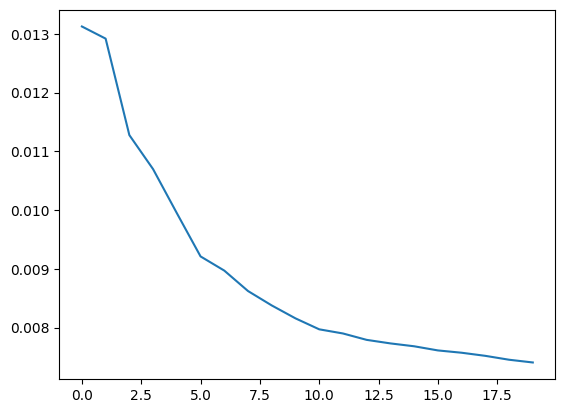

In [24]:
plt.plot(history.keys(), [np.mean(val)  for val in history.values()])

In [25]:
input_eval = scaled_train[-n_inputs:].reshape((1,n_inputs, n_features)) #learn reshape

In [27]:
input_eval , input_eval.shape

(array([[[0.1038961 , 0.        , 0.71186441, ..., 0.53254438,
          0.16      , 0.16      ],
         [0.11688312, 0.        , 0.72881356, ..., 0.52662722,
          0.404     , 0.404     ],
         [0.11688312, 0.        , 0.72881356, ..., 0.5147929 ,
          0.204     , 0.204     ],
         ...,
         [0.18181818, 0.        , 0.69491525, ..., 0.50295858,
          0.334     , 0.334     ],
         [0.09090909, 0.        , 0.69491525, ..., 0.52071006,
          0.788     , 0.788     ],
         [0.1038961 , 0.        , 0.69491525, ..., 0.53846154,
          0.772     , 0.772     ]]]),
 (1, 144, 28))

In [28]:
prediction = model(input_eval)
prediction = tf.squeeze(prediction, 0)
prediction = prediction.numpy()
np.append(input_eval[:,1:,:], [[prediction]], axis = 1)

array([[[0.11688312, 0.        , 0.72881356, ..., 0.52662722,
         0.404     , 0.404     ],
        [0.11688312, 0.        , 0.72881356, ..., 0.5147929 ,
         0.204     , 0.204     ],
        [0.12987013, 0.        , 0.74576271, ..., 0.50887574,
         0.026     , 0.026     ],
        ...,
        [0.09090909, 0.        , 0.69491525, ..., 0.52071006,
         0.788     , 0.788     ],
        [0.1038961 , 0.        , 0.69491525, ..., 0.53846154,
         0.772     , 0.772     ],
        [0.14175621, 0.05714402, 0.70421362, ..., 0.50686467,
         0.53250456, 0.52718389]]])

In [29]:
# Forecast
def generate_forecast(model, input_eval, generation_length=12):
  # Empty string to store our results
  predictions = []


  for i in range(generation_length):
      '''TODO: evaluate the inputs and generate the next character predictions'''
      prediction = model(input_eval)
      prediction = tf.squeeze(prediction, 0)
      prediction = prediction.numpy()

      predictions.append(prediction)
      input_eval = np.append(input_eval[:,1:,:], [[prediction]], axis = 1)
  return predictions

In [39]:
predictions = generate_forecast(model, input_eval, len(test))

In [40]:
true_predictions = scaler.inverse_transform(predictions)

In [41]:
true_predictions = pd.DataFrame(true_predictions, columns = test.columns)

In [42]:
true_predictions.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,129.152279,1.714320,24.554860,38.228254,23.946265,35.766471,25.263510,38.042930,24.331809,39.440048,...,21.910411,36.832370,16.776632,755.799545,53.231189,2.039995,39.531910,7.166013,26.625228,26.359195
1,145.022304,2.473870,24.592105,38.408462,23.903303,35.957664,25.297212,38.168891,24.370719,39.433468,...,21.849700,36.709359,16.787703,755.809388,52.526779,1.960576,38.482652,7.036438,26.573929,26.437902
2,148.878083,2.980463,24.628631,38.498645,23.892601,36.100572,25.315179,38.220226,24.414163,39.446667,...,21.821757,36.642991,16.920215,755.882397,51.947552,1.914975,37.568841,6.959129,27.024385,26.796612
3,149.074493,3.258483,24.641500,38.465092,23.862033,36.113419,25.315160,38.175729,24.424043,39.440973,...,21.795318,36.563281,16.992566,755.932030,51.114149,1.890972,36.538494,6.839422,27.288553,26.955783
4,149.292371,3.379470,24.663151,38.361332,23.837062,36.123274,25.313200,38.118340,24.440061,39.429066,...,21.776985,36.468929,17.142900,756.034198,50.181054,1.903704,35.755950,6.726258,27.596787,27.148089


<Axes: >

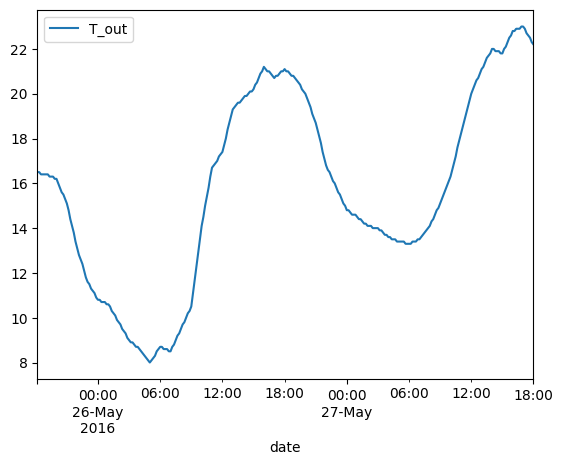

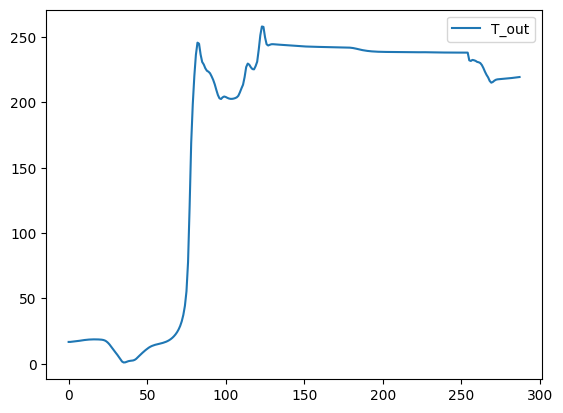

In [43]:
test[["T_out"]].plot()
true_predictions[["T_out"]].plot()

In [44]:
len(test)

288

In [ ]:
len()